#### This example uses eugenfaces to associate images present in a training set with those in a test set, initialy using some simple statistical measures.

In [2]:
#Loading the modules
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

In [9]:
#Loanding the dataset from the olivetti faces
dataset = fetch_olivetti_faces(shuffle=True,
                              random_state=101)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\USER\scikit_learn_data


#### We begin by using olivetti faces dataset which is a public domain set oof images, that is readily available from sklearn.

#### Then we go ahead to split the images into training and test label images without knowing test set except training set. So as to asssociate from test set to the most similar image from the training set

In [12]:
train_faces = dataset.data[:350,:]
test_faces = dataset.data[350:,:]
train_answer = dataset.target[:350]
test_answer = dataset.target[350:]

##### Unfolding the picture pixels into features to create a dataset of different cases(400) and variables(4096). Since that seems like a high number of features, we use RandomizePCA to reduce it to a smaller and manageable size.

In [15]:
from sklearn.decomposition import PCA as RandomizedPCA

In [18]:
n_components = 25
Rpca = RandomizedPCA(n_components=n_components,
                    whiten=True,
                    random_state=101).fit(train_faces)
                    

##### Randomized is an approximate of PCA version and works better under a large dataset just as many rows and variables. 

From the above setting, we set the component variables into 25(n_components parameter) and whitening (whiten=True), to remove some noise associated to it and some irregular information from tje images in different ways from the filters. Which lead to 80% of the information held in 4096 features.

In [23]:
print('Explaines variance by %i components: %0.3f' %
                         (n_components,
                         np.sum(Rpca.explained_variance_ratio_)))
                    

Explaines variance by 25 components: 0.794


In [24]:
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces = Rpca.transform(test_faces)

We are looking for face id=34


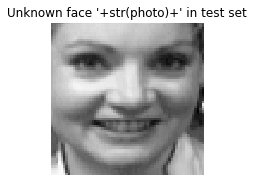

In [26]:
#Now let's go and plot the result 
import matplotlib.pyplot as plt

photo = 17 #This is the photo in the test set
print('We are looking for face id=%i'
     % test_answer[photo])

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Unknown face '+str(photo)+' in test set")
plt.imshow(test_faces[photo].reshape(64, 64),
          cmap=plt.cm.gray, interpolation='nearest')
plt.show()

##### After the decomposition of the test set, the example takes the data relative only to photo 17 and subtract it from the decomposition of the training set. Now the training set is made of differences with respect to the example photo. With the code, we squre them and sum them by row to arrive at a series of summed errors. The most similar photos are the ones with the latest squared errors, that is, the ones whose differences are the least.

In [30]:
#Just the vector of the value components of our photo

mask = compressed_test_faces[photo,]
squared_errors = np.sum((compressed_train_faces - 
                            mask)**2,axis=1)

minimum_error_face = np.argmin(squared_errors)
most_resembling = list(np.where(squared_errors < 20)[0])

print('Best resembling face in train test: %i' %
     train_answer[minimum_error_face])


Best resembling face in train test: 34


##### The code can now display photo 17, as the best resembled images from the train set

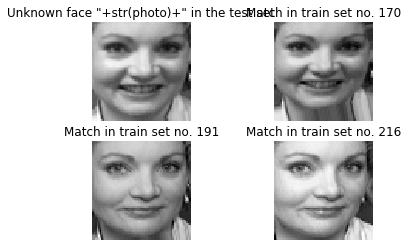

In [31]:
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Unknown face "+str(photo)+" in the test set')
plt.imshow(test_faces[photo].reshape(64, 64),
          cmap=plt.cm.gray, interpolation='nearest')
for k, m in enumerate(most_resembling[:3]):
    plt.subplot(2, 2, 2+k)
    plt.title('Match in train set no. '+str(m))
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64, 64),
              cmap=plt.cm.gray, interpolation='nearest')
plt.show()